<a href="https://colab.research.google.com/github/hoantran14/ANN/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mping
from keras.models import load_model
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing import image
import cv2 as cv
import tensorflow as tf
import pandas as pd
from keras.layers import Flatten
from PIL import Image



Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 46ms/step - accuracy: 0.7671 - loss: 0.6979 - val_accuracy: 0.8720 - val_loss: 0.3526 - learning_rate: 0.0010
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8662 - loss: 0.3755 - val_accuracy: 0.8632 - val_loss: 0.3567 - learning_rate: 0.0010
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 45ms/step - accuracy: 0.8801 - loss: 0.3282 - val_accuracy: 0.8752 - val_loss: 0.3368 - learning_rate: 0.0010
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.8949 - loss: 0.2903 - val_accuracy: 0.8896 - val_loss: 0.2955 - learning_rate: 0.0010
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9037 - loss: 0.2662 - val_accuracy: 0.8965 - val_loss: 0.2925 - learning_rate: 0.0010
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 45ms/step - accuracy: 0.9060 - loss: 0.2503 - val_accuracy: 0.9007 - val_loss: 0.2747 - learning_rate: 0.0010
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 44ms/s

313/313 - 3s - 10ms/step - accuracy: 0.9231 - loss: 0.2986

Accuracy: 0.9230999946594238
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


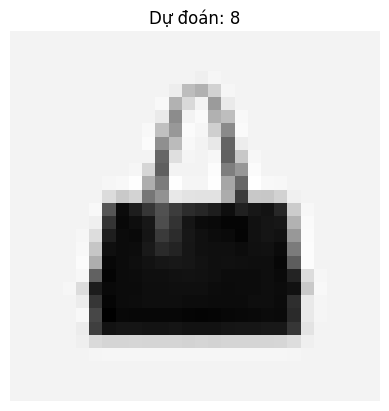

Dự đoán cho /content/bag.jfif: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


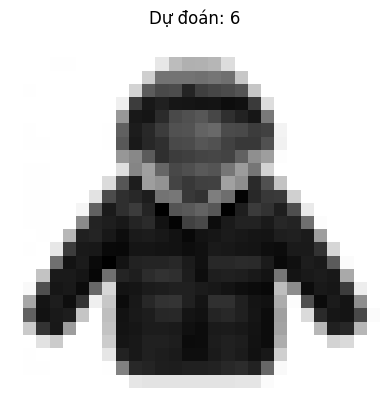

Dự đoán cho /content/coat.jfif: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


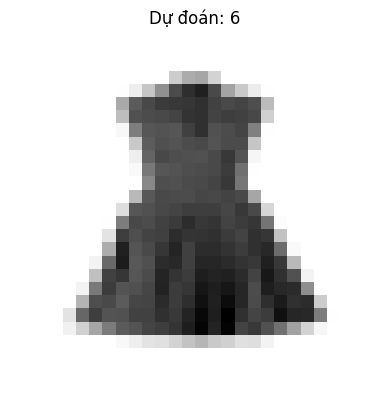

Dự đoán cho /content/dress.jfif: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


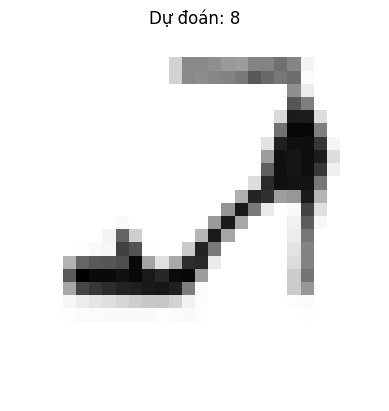

Dự đoán cho /content/highheels.jfif: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


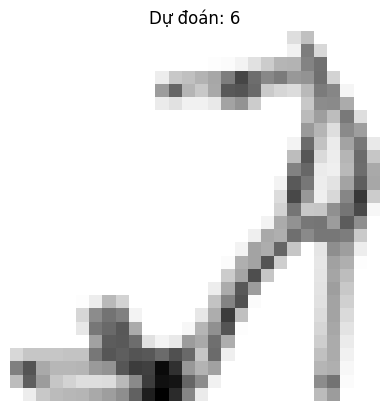

Dự đoán cho /content/highheels2.jfif: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


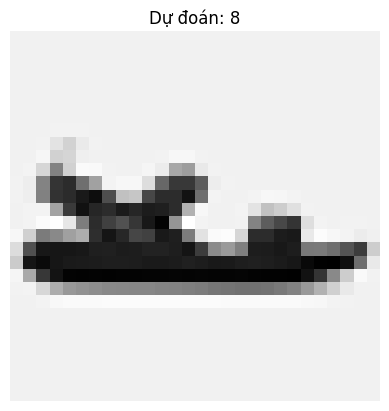

Dự đoán cho /content/sandals.jfif: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


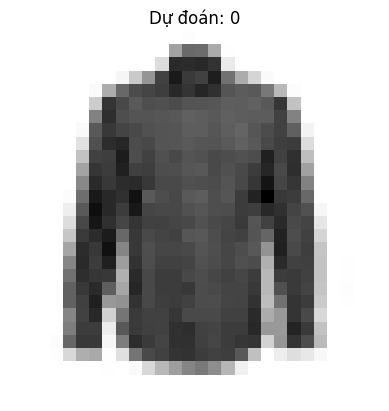

Dự đoán cho /content/shirt.jfif: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


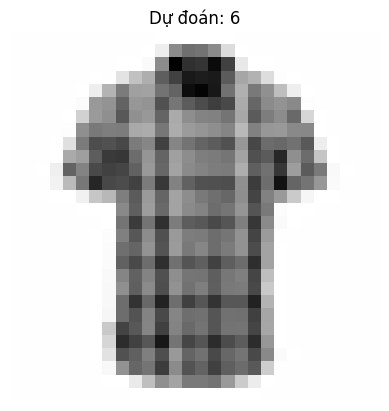

Dự đoán cho /content/shirt2.jfif: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


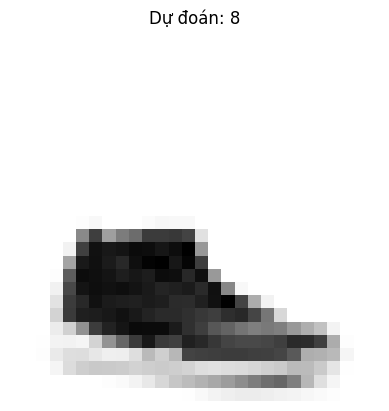

Dự đoán cho /content/sneakers.jfif: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


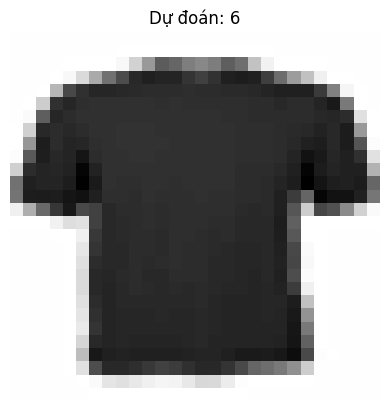

Dự đoán cho /content/t-shirt.jfif: 6


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ReduceLROnPlateau


fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[reduce_lr])


model.save('fashion_mnist_model.h5')


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nAccuracy:', test_acc)


def predict_external_image(image_path):
    img = Image.open(image_path).convert('L').resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    plt.imshow(img, cmap='gray')
    plt.title(f"Dự đoán: {predicted_label}")
    plt.axis('off')
    plt.show()
    return predicted_label

external_images = ['/content/bag.jfif', '/content/coat.jfif', '/content/dress.jfif', '/content/highheels.jfif', '/content/highheels2.jfif',
                   '/content/sandals.jfif', '/content/shirt.jfif', '/content/shirt2.jfif', '/content/sneakers.jfif', '/content/t-shirt.jfif']


for image_path in external_images:
    result = predict_external_image(image_path)
    print(f"Dự đoán cho {image_path}: {result}")
